# 이미지 데이터 특징 파악하기
## Step 1. 라이브러리 로딩

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Step 2. 데이터 로딩

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
# 데이터 확인
# X_train[0][0][0]
# 인덱서 7에 있는 이미지 한 장
X_train[7]
# 인덱스 7에 있는 이미지의 첫번쨰선
X_train[7][5]

array([  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
       236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
         4,   0], dtype=uint8)

# 이미지 확인
- 28 x 28 이미지
- 한 개의 픽셀은 0~255로 표현이 됨
- 0: 검정, 255: 흰색

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

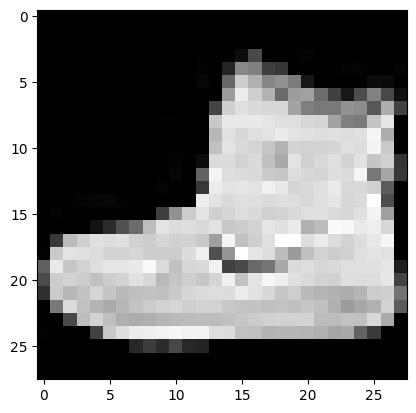

In [6]:
# X_train 데이터의 0번째 이미지
plt.imshow(X_train[0], cmap='gray')
plt.show()

# CNN 학습을 위한 image Data 표현
- CNN은 4D이어야 함.
- (데이터수, 이미지행의_픽셀수, 이미지열의_픽셀수, 채널수)
- 채널수
    - 흑백 : 1
    - 컬러 : 3

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
(60000, 28, 28, 1)

(60000, 28, 28, 1)

# CNN 모델 만들기

In [9]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train.max()

np.uint8(255)

In [11]:
X_train.min()

np.uint8(0)

In [12]:
# 정규화 0~1 사이값으로 정규화, 실수로 변환
X_train = X_train/255.0

In [13]:
X_train.max()

np.float64(1.0)

In [14]:
X_train.min()

np.float64(0.0)

In [15]:
# X_test 데이터 정규화
X_test = X_test/255.0

## Reshaping of the dataset
- DNN에서는 Feature를 2D로 넣어야 함

## CNN으로 모델 만들기

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
# CNN 모듈 로딩
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [17]:
def build_model(input_shape):  # (28x28x1) <- 이미지 shape
    model = Sequential()
    model.add(Input(shape=(input_shape)))
    # CNN구조 만들기
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    
    # 2D -> 1D 바꿔야함. DNN은 2D 이미지를 못받음
    model.add(Flatten())
    
    # DNN구조 만들기
    model.add(Dense(128, 'relu'))
    model.add(Dropout(0.2))    # 0.2 정도 연결을 끊음, 오버피팅을 감소시킥 위해서, 실험을 통해서 알게된 결과임
    model.add(Dense(64, 'relu'))
    model.add(Dropout(0.2))    # 0.2 정도 연결을 끊음, 오버피팅을 감소시킥 위해서, 실험을 통해서 알게된 결과임
    model.add(Dense(64, 'relu'))
    model.add(Dropout(0.2))    # 0.2 정도 연결을 끊음, 오버피팅을 감소시킥 위해서, 실험을 통해서 알게된 결과임
    model.add(Dense(10, 'softmax'))

    # 학습 방식
    model.compile(optimizer=Adam(), # learning_rate=0.001
                  loss=SparseCategoricalCrossentropy(), 
                  metrics=[SparseCategoricalAccuracy()])
    return model

### 모델학습

In [18]:
# 이미지 한장의 shape
input_shape = (28, 28, 1)
# 모델 만들기 함수 호출, 리턴값: 빌드된 모델 객체
model = build_model(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,698 (526.16 KB)

 Trainable params: 134,698 (526.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# validation_data=(X_test, y_test) : 학습하면서 쪽지시험 데이터를 주는 것
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.6241 - sparse_categorical_accuracy: 0.7707 - val_loss: 0.3909 - val_sparse_categorical_accuracy: 0.8588
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8624 - val_loss: 0.3182 - val_sparse_categorical_accuracy: 0.8808
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.3326 - sparse_categorical_accuracy: 0.8823 - val_loss: 0.2973 - val_sparse_categorical_accuracy: 0.8922
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.2971 - sparse_categorical_accuracy: 0.8923 - val_loss: 0.2764 - val_sparse_categorical_accuracy: 0.9002
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.2772 - sparse_categorical_accuracy: 0.9020 - val_loss: 0.2793 - val_sparse_categorical_accuracy: 0.8957
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.2572 - sparse_categorical_accuracy: 0.9074 - val_loss: 0.2744 - val_sparse_categorical_acc

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3512 - sparse_categorical_accuracy: 0.9075


[0.35119369626045227, 0.9075000286102295]

## Step 5. 모델평가

In [22]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3512 - sparse_categorical_accuracy: 0.9075


[0.35119369626045227, 0.9075000286102295]

In [23]:
y_pred_prob = model.predict(X_test)
y_pred_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[7.78353814e-35, 2.61719703e-32, 2.01014212e-35, ...,
        4.30300630e-12, 8.18186562e-32, 1.00000000e+00],
       [2.16374865e-08, 2.51840324e-12, 9.99467432e-01, ...,
        2.24010738e-15, 7.58722986e-14, 5.08707405e-15],
       [1.20970609e-28, 1.00000000e+00, 1.65798409e-33, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.10909545e-18, 2.30481539e-35, 7.02124879e-21, ...,
        1.66932599e-32, 1.00000000e+00, 9.72218296e-38],
       [8.44878481e-21, 1.00000000e+00, 9.80840499e-26, ...,
        1.08161785e-36, 8.01605450e-33, 1.90199063e-33],
       [1.75440294e-12, 6.72545190e-13, 1.58529585e-14, ...,
        7.35038047e-05, 4.38554615e-08, 1.54500146e-08]],
      shape=(10000, 10), dtype=float32)

In [25]:
y_pred_prob.shape

(10000, 10)

### 예측 결과 확인하기

In [30]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

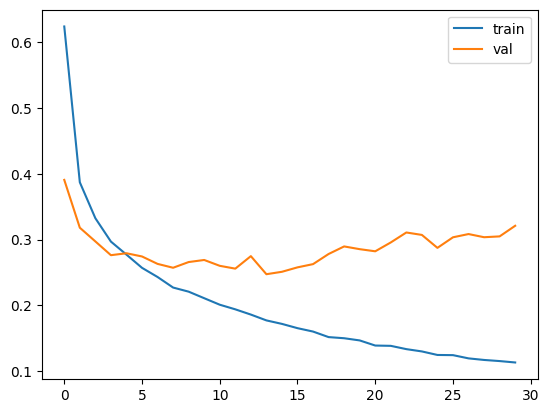

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.show()

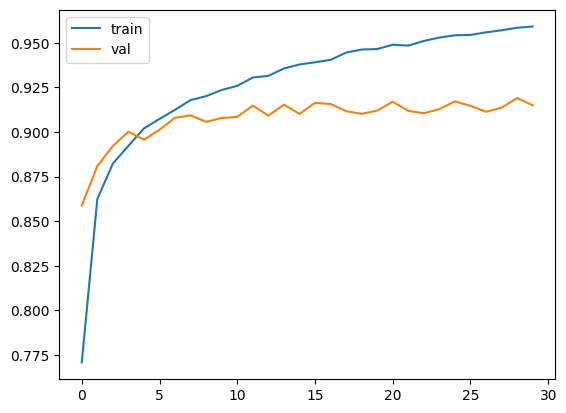

In [32]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['train', 'val'])
plt.show()

In [33]:
# 예측결과 (가장 큰값의 인덱스)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
# 실제값
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
# 예측결과 (가장 큰 값의 인덱스)
y_pred

array([[7.78353814e-35, 2.61719703e-32, 2.01014212e-35, ...,
        4.30300630e-12, 8.18186562e-32, 1.00000000e+00],
       [2.16374865e-08, 2.51840324e-12, 9.99467432e-01, ...,
        2.24010738e-15, 7.58722986e-14, 5.08707405e-15],
       [1.20970609e-28, 1.00000000e+00, 1.65798409e-33, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.10909545e-18, 2.30481539e-35, 7.02124879e-21, ...,
        1.66932599e-32, 1.00000000e+00, 9.72218296e-38],
       [8.44878481e-21, 1.00000000e+00, 9.80840499e-26, ...,
        1.08161785e-36, 8.01605450e-33, 1.90199063e-33],
       [1.75440294e-12, 6.72545190e-13, 1.58529585e-14, ...,
        7.35038047e-05, 4.38554615e-08, 1.54500146e-08]],
      shape=(10000, 10), dtype=float32)

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [37]:
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))

<Axes: >

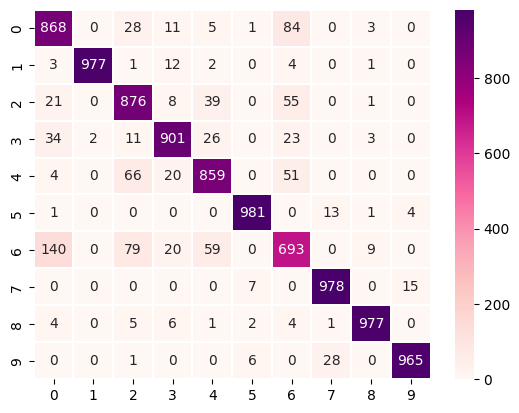

In [38]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', linewidths=0.1, cmap='RdPu')

## Step 6. 모델 저장

In [ ]:
import os
os.makedirs('models', exist_ok=True)
model.save('models/fashion_mnist_model.keras')

## Step 7. 모델 로딩

In [ ]:
from tensorflow.keras.models import load_model
model_2 = load_model('models/fashion_mnist_model.keras')
model_2.evaluate(X_test, y_test)

In [ ]:
y_pred_label = np.argmax(y_pred, axis =1)

In [ ]:
y_pred_label[:5]

- 예측값 시각화 하기

In [ ]:
plt.plot(y_test[:100])
plt.plot(y_pred_label[:100])
plt.legend(['y_test', 'y_pred'])
plt.show()

In [ ]:
# 컨퓨전 매트릯, 평가 레포트